In [6]:
import boto3
import pandas as pd; pd.set_option('display.max_columns', 100)
import numpy as np 

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

s3 = boto3.resource('s3')
bucket_name = "rachaeld-data445"
bucket = s3.Bucket(bucket_name)

file_key = 'circle_data.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

#reading the data-file
circles = pd.read_csv(file_content_stream)
circles.head()

,x,y
0,0.421362,0.161185
1,-0.385647,0.449012
2,0.425654,-0.100170
3,-0.574566,0.741009
4,-0.255552,0.572340


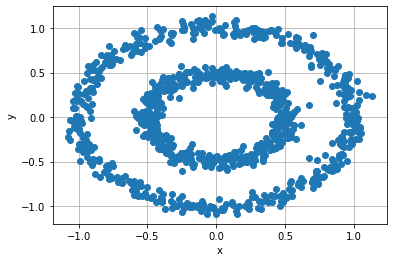

In [9]:
## let's visualize the data
plt.plot(circles['x'], circles['y'], 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

In [10]:
##changing the scale
scaler = MinMaxScaler()

circles[['x_0_1', 'y_0_1']] = scaler.fit_transform(circles)
circles.head()

,x,y,x_0_1,y_0_1
0,0.421362,0.161185,0.677955,0.562456
1,-0.385647,0.449012,0.313458,0.692048
2,0.425654,-0.100170,0.679893,0.444782
3,-0.574566,0.741009,0.228130,0.823518
4,-0.255552,0.572340,0.372217,0.747576


In [11]:
##running spectral clustering (clusters = 2)
spectral_clustering = SpectralClustering(n_clusters = 2, affinity = 'nearest_neighbors', n_neighbors = 20).fit(circles[['x_0_1', 'y_0_1']])

##appending the cluster labels
circles['spectral_cluster'] = spectral_clustering.labels_
circles.head(10)

,x,y,x_0_1,y_0_1,spectral_cluster
0,0.421362,0.161185,0.677955,0.562456,1
1,-0.385647,0.449012,0.313458,0.692048,1
2,0.425654,-0.100170,0.679893,0.444782,1
3,-0.574566,0.741009,0.228130,0.823518,0
4,-0.255552,0.572340,0.372217,0.747576,1
5,0.214523,-0.500648,0.584533,0.264470,1
6,0.893340,0.266634,0.891130,0.609934,0
7,0.931335,0.179790,0.908291,0.570833,0
8,0.855901,-0.520083,0.874220,0.255720,0
9,-0.635288,-0.712810,0.200704,0.168945,0


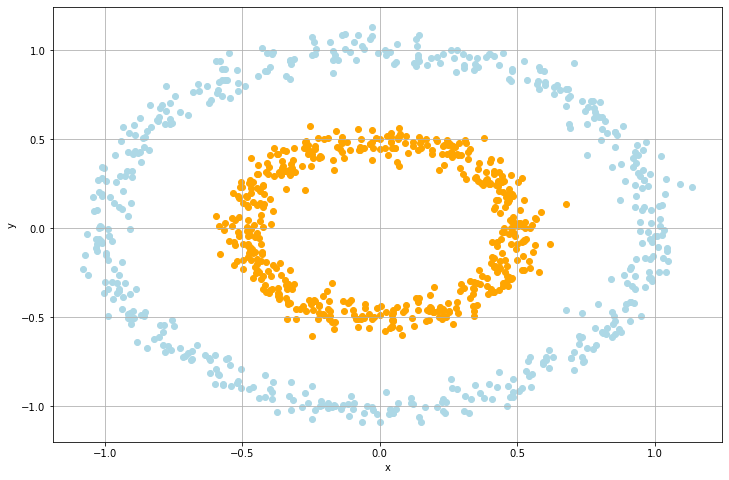

In [12]:
##visualizing the spectral clustering results
colors = ['lightblue', 'orange']
plt.figure(figsize = (12,8))
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

for i in circles['spectral_cluster'].unique():
    
    temp = circles[circles['spectral_cluster'] == i]
    plt.scatter(temp['x'], temp['y'], color = colors[i])